# Iterative Policy Evaluation, for estimating V $\approx v_{\pi}$

- To produce each successive approximation,$v_{k+1}$ from $v_{k}$, iterative policy evaluation applies the same operation to each state s: it replaces the old value of s with a new value obtained from the old values of the successor states of s, and the expected immediate rewards, along all the one-step transitions possible under the policy being evaluated. We call this kind of operation an expected update.
- Each iteration of iterative policy evaluation updates the value of every state once to produce the new approximate value function $v_{k+1}$
- As $ k \rightarrow \infty$, $v_{k} \rightarrow v_{\pi}$

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [36]:
# Actions
actions = [np.array([-1, 0]), 
           np.array([1, 0]), 
           np.array([0, 1]),
           np.array([0, -1])]

# Action Probability = 0.25 because its random
action_prob = 0.25

# Length of Grid
length = 4

# Theta = e^-5
theta = math.exp(-10)

In [37]:
def step(state, action):
    state = np.array(state)
    next_state = state + action
    # Can't go out of bounds!
    if (next_state[0] < 0) or (next_state[1] < 0) or (next_state[0] >= length) or (next_state[1] >= length):
        next_state = state
    
    reward = -1
    return reward, next_state
    
def terminal_state(state):
    if (state[0] == 0 and state[1] == 0) or (state[0] == length - 1 and state[1] == length - 1):
        return True
    return False

def iterative_policy_evaluation(length, actions, action_prob, theta):
    new_values = np.zeros([length, length])
    state_values = new_values.copy()
    k = 0
    deltas = []
    while True:
        for i in range(length):
            for j in range(length):
                if terminal_state([i, j]):
                        continue
                value = 0
                for action in actions:
                    reward, [new_i, new_j] = step([i, j], action)
                    value += action_prob*(reward + state_values[new_i, new_j])
                    new_values[i, j] = value
        
        delta = np.sum(np.abs(new_values - state_values))
        deltas.append(delta)
        if delta < theta:
            break
        
        state_values = new_values.copy()
        k += 1
        
    print('iteration: {}'.format(k))
    print(state_values)
    
    plt.plot(deltas, label = 'delta')
    plt.xlabel('Iteration')
    plt.ylabel('delta')
    plt.legend()
    
    return k, state_values          

iteration: 231
[[  0.         -13.99995544 -19.99993397 -21.99992611]
 [-13.99995544 -17.99994183 -19.99993441 -19.99993397]
 [-19.99993397 -19.99993441 -17.99994183 -13.99995544]
 [-21.99992611 -19.99993397 -13.99995544   0.        ]]


(231, array([[  0.        , -13.99995544, -19.99993397, -21.99992611],
        [-13.99995544, -17.99994183, -19.99993441, -19.99993397],
        [-19.99993397, -19.99993441, -17.99994183, -13.99995544],
        [-21.99992611, -19.99993397, -13.99995544,   0.        ]]))

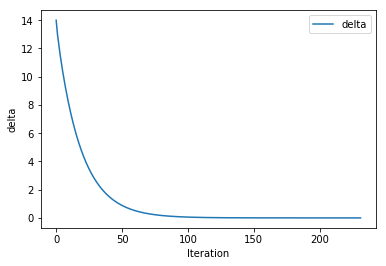

In [38]:
iterative_policy_evaluation(length, actions, action_prob, theta )
